In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('./placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
import matplotlib.pyplot as plt


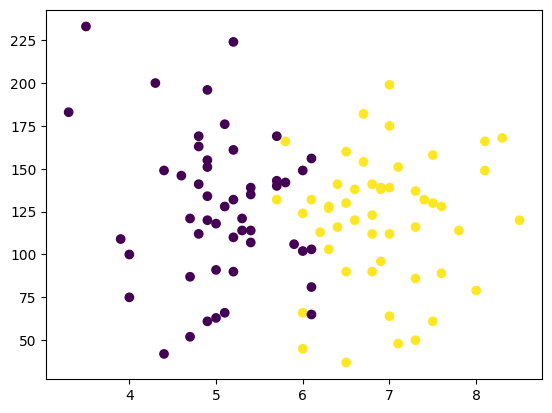

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
x = df.iloc[:,0:2]
y=df.iloc[:,-1]

In [ ]:
x.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [ ]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
x_train = scaler.fit_transform(x_train)
x_train

array([[ 1.04743502,  0.64522148],
       [-1.08093718, -1.82849771],
       [ 1.93425677,  0.59524736],
       [-1.3469837 ,  0.59524736],
       [ 0.87007067,  0.34537673],
       [-0.72620848,  0.07051904],
       [ 0.51534197, -0.87898933],
       [ 0.95875285, -1.52865296],
       [-0.81489065, -0.85400227],
       [-0.72620848,  1.26989804],
       [-1.08093718, -0.95395052],
       [-0.10543325,  1.02002742],
       [-1.16961935,  0.52028617],
       [ 0.69270632,  0.72018267],
       [ 1.40216372,  0.82013092],
       [ 2.28898547, -0.12937746],
       [-0.54884413, -0.27929983],
       [ 0.95875285,  0.34537673],
       [ 1.8455746 , -1.15384702],
       [ 0.4266598 ,  0.39535086],
       [ 1.22479937, -1.87847183],
       [ 0.0719311 , -0.57914458],
       [ 0.51534197,  0.87010504],
       [-0.46016195, -0.45420927],
       [-0.6375263 ,  0.89509211],
       [ 1.22479937, -0.97893758],
       [ 0.16061327, -1.1038729 ],
       [ 1.40216372, -1.60361415],
       [-1.08093718,

In [ ]:
x_test = scaler.fit_transform(x_test)

In [ ]:
x_test

array([[  7.8, 114. ],
       [  6.1,  65. ],
       [  6.8,  90. ],
       [  6. , 124. ],
       [  6.2, 113. ],
       [  6.8, 112. ],
       [  8.1, 166. ],
       [  6.6, 138. ],
       [  7.6, 128. ],
       [  4.4,  42. ]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred= clf.predict(x_test)

In [ ]:
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [ ]:
y_test

55    1
56    0
35    1
27    1
99    1
93    1
65    1
48    1
30    1
96    0
Name: placement, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.7

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

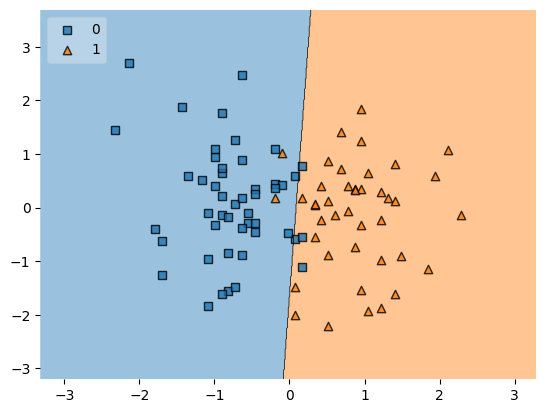

In [ ]:
plot_decision_regions(x_train, y_train.values, clf=clf,legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))